In [1]:
import ROOT
import numpy as np

Welcome to JupyROOT 6.28/00


In [2]:
# Open the ROOT file
file = ROOT.TFile("pyROOT_exercise1.root", "READ")

# Access the TTree object containing the particle data
tree = file.Get("tree")

# Create a histogram for the transverse momentum distribution
histogram = ROOT.TH1F("mass_distribution", "Invariant Mass Distribution", 100, 0, 100)

# Loop over the events in the TTree
for event in tree:
    # Access the relevant particle variables from the event
    px = event.px
    py = event.py
    pz = event.pz
    energy = event.energy
    pt = [(x**2 + y**2)**0.5 for x, y in zip(px, py)]
    pt_arr = np.array(pt)
    # Find the indices of the two highest pt particles
    indices = np.argsort(pt_arr)[-2:]
    #print(pt[indices[0]])
    particle1 = ROOT.TLorentzVector()
    particle2 = ROOT.TLorentzVector()
    if(len(indices)>1):
        #print(pt[0], pt[1])
        particle1.SetPxPyPzE(px[int(indices[0])], py[int(indices[0])], pz[int(indices[0])], energy[int(indices[0])])
        particle2.SetPxPyPzE(px[int(indices[1])], py[int(indices[1])], pz[int(indices[1])], energy[int(indices[1])])
        inv_mass = (particle1 + particle2).M()
    # Fill the histogram with the Mass values
        histogram.Fill(inv_mass)

 FCN=22.8726 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=2.30676e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.34466e+02   5.60385e+00   1.02681e-02  -2.67162e-06
   2  Mean         1.92163e+01   9.46282e-02   2.23100e-04   7.13437e-04
   3  Sigma        2.89999e+00   7.84875e-02   1.62501e-05   7.52818e-04


Info in <TCanvas::Print>: png file mass_distribution.png has been created


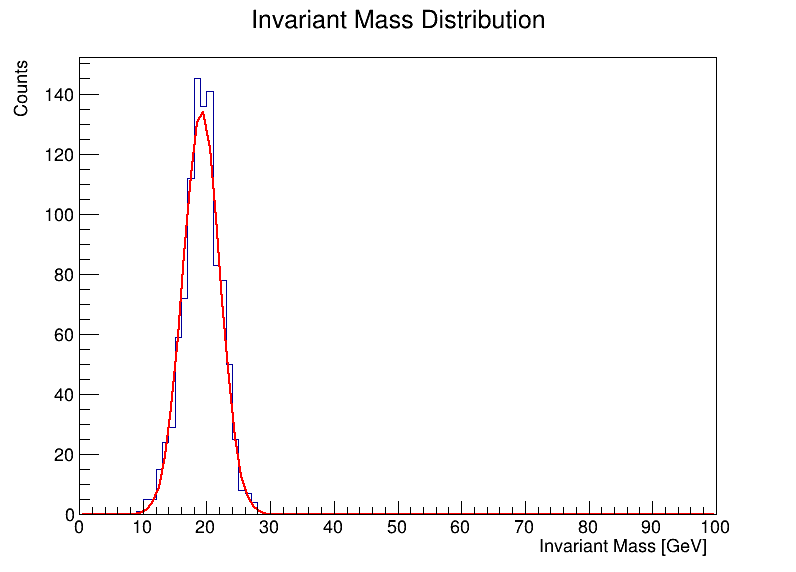

In [3]:
# Create a canvas to draw the histogram
canvas = ROOT.TCanvas("canvas", "Invariant Mass Distribution", 800, 600)
histogram.SetStats(0)
# Draw the histogram
histogram.Draw()

# Set the canvas style and attributes
canvas.SetFillColor(0)
canvas.SetBorderMode(0)
canvas.SetBorderSize(2)
canvas.SetFrameBorderMode(0)

# Fit the histogram with a Gaussian function
fit_function = ROOT.TF1("gaussian_fit", "gaus", 0, 100)
histogram.Fit(fit_function)

# Customize the plot if desired (e.g., axis labels, title, etc.)
histogram.GetXaxis().SetTitle("Invariant Mass [GeV]")
histogram.GetYaxis().SetTitle("Counts")
histogram.SetTitle("Invariant Mass Distribution")

# Update the canvas
canvas.Update()

# Save the plot as an image file
canvas.SaveAs("mass_distribution.png")

canvas.Draw()

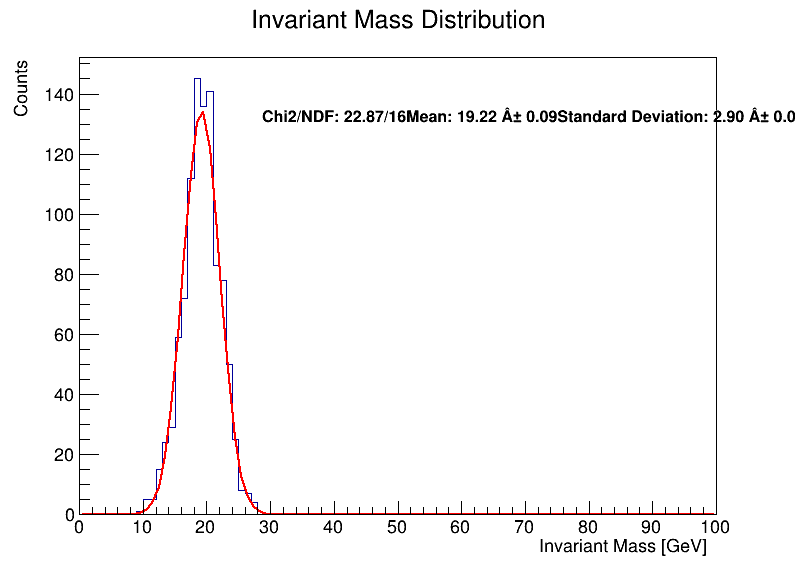

In [4]:
# Get the fit information
fit_info = f"Chi2/NDF: {fit_function.GetChisquare():.2f}/{fit_function.GetNDF()}"
fit_info += f"Mean: {fit_function.GetParameter(1):.2f} ± {fit_function.GetParError(1):.2f}"
fit_info += f"Standard Deviation: {fit_function.GetParameter(2):.2f} ± {fit_function.GetParError(2):.2f}"

# Add the fit information box to the canvas
info_box = ROOT.TPaveText(0.3, 0.7, 0.9, 0.9, "NDC")
info_box.SetFillColor(0)
info_box.SetFillStyle(0)
info_box.SetBorderSize(0)
info_box.SetTextAlign(12)
info_box.SetTextSize(0.03)
info_box.AddText(fit_info)
info_box.Draw()

canvas.Update()
canvas.Draw()

In [5]:
# Close the ROOT file
file.Close()